In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def list_files(ext=".csv"):
    files = os.listdir('.')
    print("Files in the current directory:")
    for file in files:
        if file.endswith(ext):
            print(file)

def load_dfs(files):
    dfs = {}
    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file, index_col=0)
            dfs["".join("".join(file.split("_")[-2:]).split(".")[0:-1])] = df

    dfs = pd.concat(dfs, axis=1, keys=dfs.keys())
    return dfs

dfs = load_dfs(os.listdir('.'))

In [34]:
dfs

MLP08                                                    \
                128       256       512      1024      2048      4096   
-8.000000  1.438265  1.408712  1.385994  1.357753  1.328333  1.296135   
-7.578947  1.358938  1.318613  1.287519  1.252682  1.217083  1.176750   
-7.157895  1.276691  1.221677  1.177526  1.133120  1.085619  1.032271   
-6.736842  1.190259  1.119104  1.057919  0.998519  0.934679  0.864018   
-6.315789  1.107825  1.018139  0.937654  0.860549  0.784149  0.700007   
...             ...       ...       ...       ...       ...       ...   
-1.538462       NaN       NaN       NaN       NaN       NaN       NaN   
-1.230769       NaN       NaN       NaN       NaN       NaN       NaN   
-0.923077       NaN       NaN       NaN       NaN       NaN       NaN   
-0.615385       NaN       NaN       NaN       NaN       NaN       NaN   
-0.307692       NaN       NaN       NaN       NaN       NaN       NaN   

                      muMLP03                      ... NTKMLP04               \
               8192       128       512      2048  ...      128 256 512 1024   
-8.000000  1.248522  1.458529  1.418735  1.415317  ...      NaN NaN NaN  NaN   
-7.578947  1.119311  1.382450  1.335881  1.329367  ...      NaN NaN NaN  NaN   
-7.157895  0.959818  1.300118  1.237687  1.226191  ...      NaN NaN NaN  NaN   
-6.736842  0.775064  1.203083  1.116718  1.100129  ...      NaN NaN NaN  NaN   
-6.315789  0.601254  1.091451  0.977864  0.947524  ...      NaN NaN NaN  NaN   
...             ...       ...       ...       ...  ...      ...  ..  ..  ...   
-1.538462       NaN       NaN       NaN       NaN  ...      NaN NaN NaN  NaN   
-1.230769       NaN       NaN       NaN       NaN  ...      NaN NaN NaN  NaN   
-0.923077       NaN       NaN       NaN       NaN  ...      NaN NaN NaN  NaN   
-0.615385       NaN       NaN       NaN       NaN  ...      NaN NaN NaN  NaN   
-0.307692       NaN       NaN       NaN       NaN  ...      NaN NaN NaN  NaN   

                        MLP03                                
          2048 4096       128       512      2048      8192  
-8.000000  NaN  NaN  1.640864  1.596109  1.547952  1.459391  
-7.578947  NaN  NaN  1.558623  1.511632  1.457252  1.360061  
-7.157895  NaN  NaN  1.470554  1.414224  1.347989  1.235037  
-6.736842  NaN  NaN  1.371221  1.296922  1.210916  1.071107  
-6.315789  NaN  NaN  1.259619  1.155976  1.039043  0.863784  
...        ...  ...       ...       ...       ...       ...  
-1.538462  NaN  NaN       NaN       NaN       NaN       NaN  
-1.230769  NaN  NaN       NaN       NaN       NaN       NaN  
-0.923077  NaN  NaN       NaN       NaN       NaN       NaN  
-0.615385  NaN  NaN       NaN       NaN       NaN       NaN  
-0.307692  NaN  NaN       NaN       NaN       NaN       NaN  

[106 rows x 67 columns]

In [35]:
filter_columns = [col for col in dfs.columns if "1" in col[0]]
filter_columns = [col for col in filter_columns if "mu" in col[0] or "NTK" in col[0]]
dfs = dfs[filter_columns]
dfs

muMLP10                                                    \
                128       256       512      1024      2048      4096   
-8.000000  1.448858  1.324313  1.218277  1.131014  1.072792  1.037055   
-7.578947       NaN       NaN       NaN       NaN       NaN       NaN   
-7.157895       NaN       NaN       NaN       NaN       NaN       NaN   
-6.736842       NaN       NaN       NaN       NaN       NaN       NaN   
-6.315789       NaN       NaN       NaN       NaN       NaN       NaN   
...             ...       ...       ...       ...       ...       ...   
-1.538462  1.216082  1.064287  0.905220  0.767574  0.687820  0.604433   
-1.230769  1.451282  1.334951  1.182181  1.061743  0.966643  0.882933   
-0.923077  1.630785  1.546188  1.472294  1.342059  1.220470  1.188613   
-0.615385  1.832140  1.784361  1.730218  1.641246       NaN  1.439214   
-0.307692  2.086815       NaN  1.945641       NaN       NaN       NaN   

           NTKMLP10                                                            
                128       256       512      1024      2048     4096     8192  
-8.000000  1.965769  1.839905  1.725064  1.568551  1.334393  0.98535  0.82602  
-7.578947       NaN       NaN       NaN       NaN       NaN      NaN      NaN  
-7.157895       NaN       NaN       NaN       NaN       NaN      NaN      NaN  
-6.736842       NaN       NaN       NaN       NaN       NaN      NaN      NaN  
-6.315789       NaN       NaN       NaN       NaN       NaN      NaN      NaN  
...             ...       ...       ...       ...       ...      ...      ...  
-1.538462  2.218334  2.250897  2.232782  2.809936  1.913255      NaN      NaN  
-1.230769  2.215053  2.252185  2.302583  2.450894       NaN      NaN      NaN  
-0.923077  2.265762  2.250559  2.302515       NaN       NaN      NaN      NaN  
-0.615385  2.302556  2.260158  2.302583       NaN       NaN      NaN      NaN  
-0.307692  2.301373  2.280704  2.302537       NaN       NaN      NaN      NaN  

[106 rows x 13 columns]

/tmp/ipykernel_1703048/179174497.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(keys))


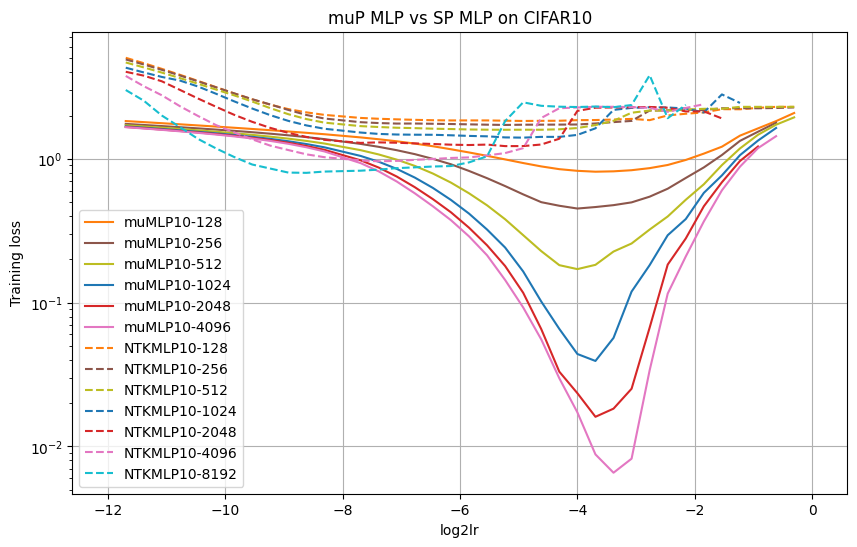

In [36]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(10, 6))

keys = sorted(set(col[1] for col in dfs.columns))
cmap = cm.get_cmap('tab10', len(keys))
color_map = {key: cmap(i) for i, key in enumerate(keys)}

for col in dfs.columns:
    size = ''.join(filter(str.isdigit, col[1]))
    key = col[1]
    color = color_map[key]
    linestyle = '-' if 'mu' in col[0] else '--'
    label = f"{col[0]}-{col[1]}"
    dfs[col].plot(ax=ax, label=label, linestyle=linestyle, color=color)

ax.legend()
# for col in dfs.columns:
#     min_idx = dfs[col].idxmin()
#     min_val = round(dfs[col].min(), 2)
#     if "mu" in col[0]:
#         # plt.annotate(f"{' '.join(col)}:{min_val}", xy=(min_idx, min_val), xytext=(min_idx+0.1, min_val + 0.1),
#         #             arrowprops=dict(facecolor='blue', shrink=0.01, width=1, headwidth=4, alpha=0.5))
#         plt.plot(min_idx, min_val, 'o', color='blue')
#     else:
#         # plt.annotate(f"{' '.join(col)}:{min_val}", xy=(min_idx, min_val), xytext=(min_idx+0.1, min_val + 0.1),
#         #             arrowprops=dict(facecolor='red', shrink=0.01, width=1, headwidth=4, alpha=0.5))
#         plt.plot(min_idx, min_val, 'o', color='red')

plt.title("muP MLP vs SP MLP on CIFAR10")
plt.xlabel("log2lr")
plt.ylabel("Training loss")
plt.grid()
ax.set_yscale('log')
plt.savefig("mlp_cifar10.png", dpi=300)
plt.show()

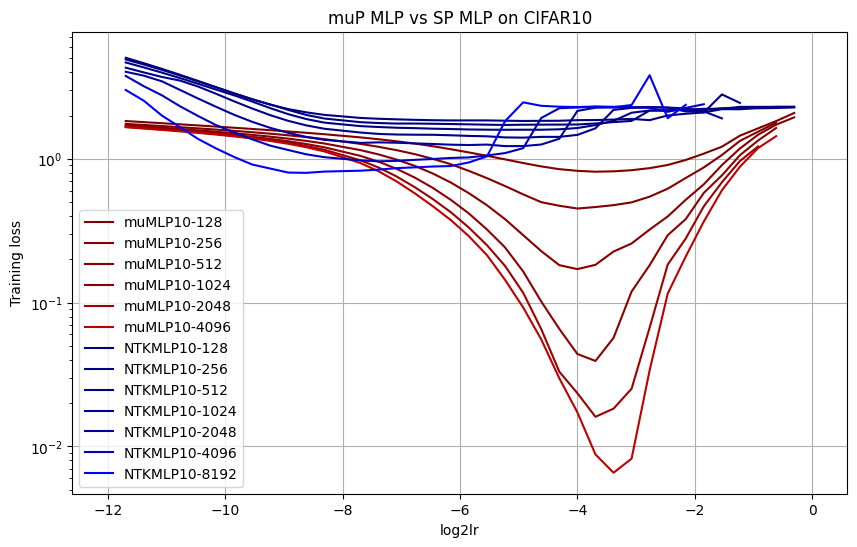

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(10, 6))

# Set explicit colors for top-level keys
color_map = {
    'muMLP10': (1.0, 0.0, 0.0),  # Red (RGB)
    'NTKMLP10':   (0.0, 0.0, 1.0),  # Blue (RGB)
}

# Extract and normalize sizes (widths) for brightness variation
sub_keys = sorted(set(col[1] for col in dfs.columns))
subkey_ints = {k: int(''.join(filter(str.isdigit, k))) for k in sub_keys}
norm = mcolors.Normalize(vmin=min(subkey_ints.values()), vmax=max(subkey_ints.values()))

for col in dfs.columns:
    model_type, size_str = col
    base_color = color_map[model_type]
    
    width = subkey_ints[size_str]
    hsv = mcolors.rgb_to_hsv(base_color)
    hsv[2] = norm(width) * 0.5 + 0.5  # brightness from [0.5, 1.0]
    color = mcolors.hsv_to_rgb(hsv)
    
    label = f"{model_type}-{size_str}"
    dfs[col].plot(ax=ax, label=label, color=color, linestyle='-')

ax.legend()
plt.title("muP MLP vs SP MLP on CIFAR10")
plt.xlabel("log2lr")
plt.ylabel("Training loss")
plt.grid()
ax.set_yscale('log')
plt.savefig("mlp_cifar10.png", dpi=300)
plt.show()
